## 1. 데이터 다운로드

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

## 2. 데이터 구조 훑어보기

In [ ]:
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


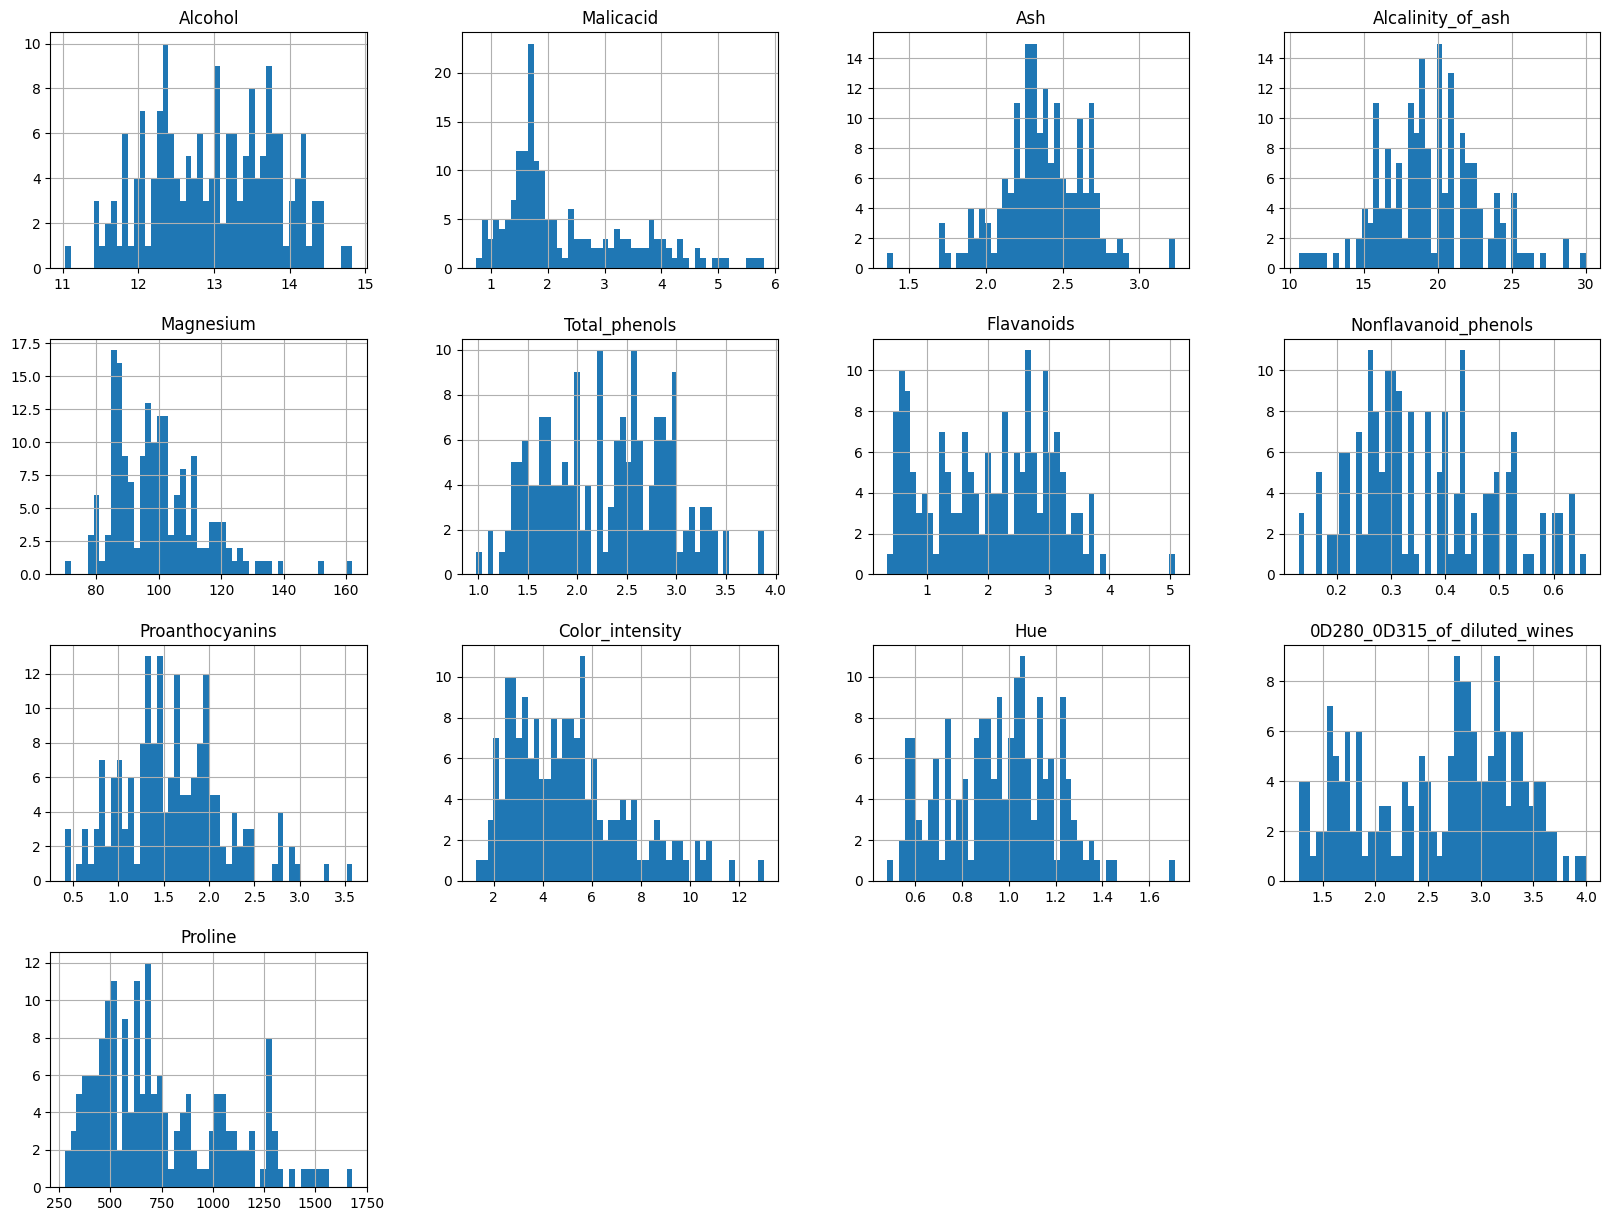

In [ ]:
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20,15))
plt.show()

# 3. Train-Test Split

In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(X, 0.2)
print(len(train_set))
print(len(test_set))

143
35


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(X, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

142
36


# 4. 상관관계 시각화

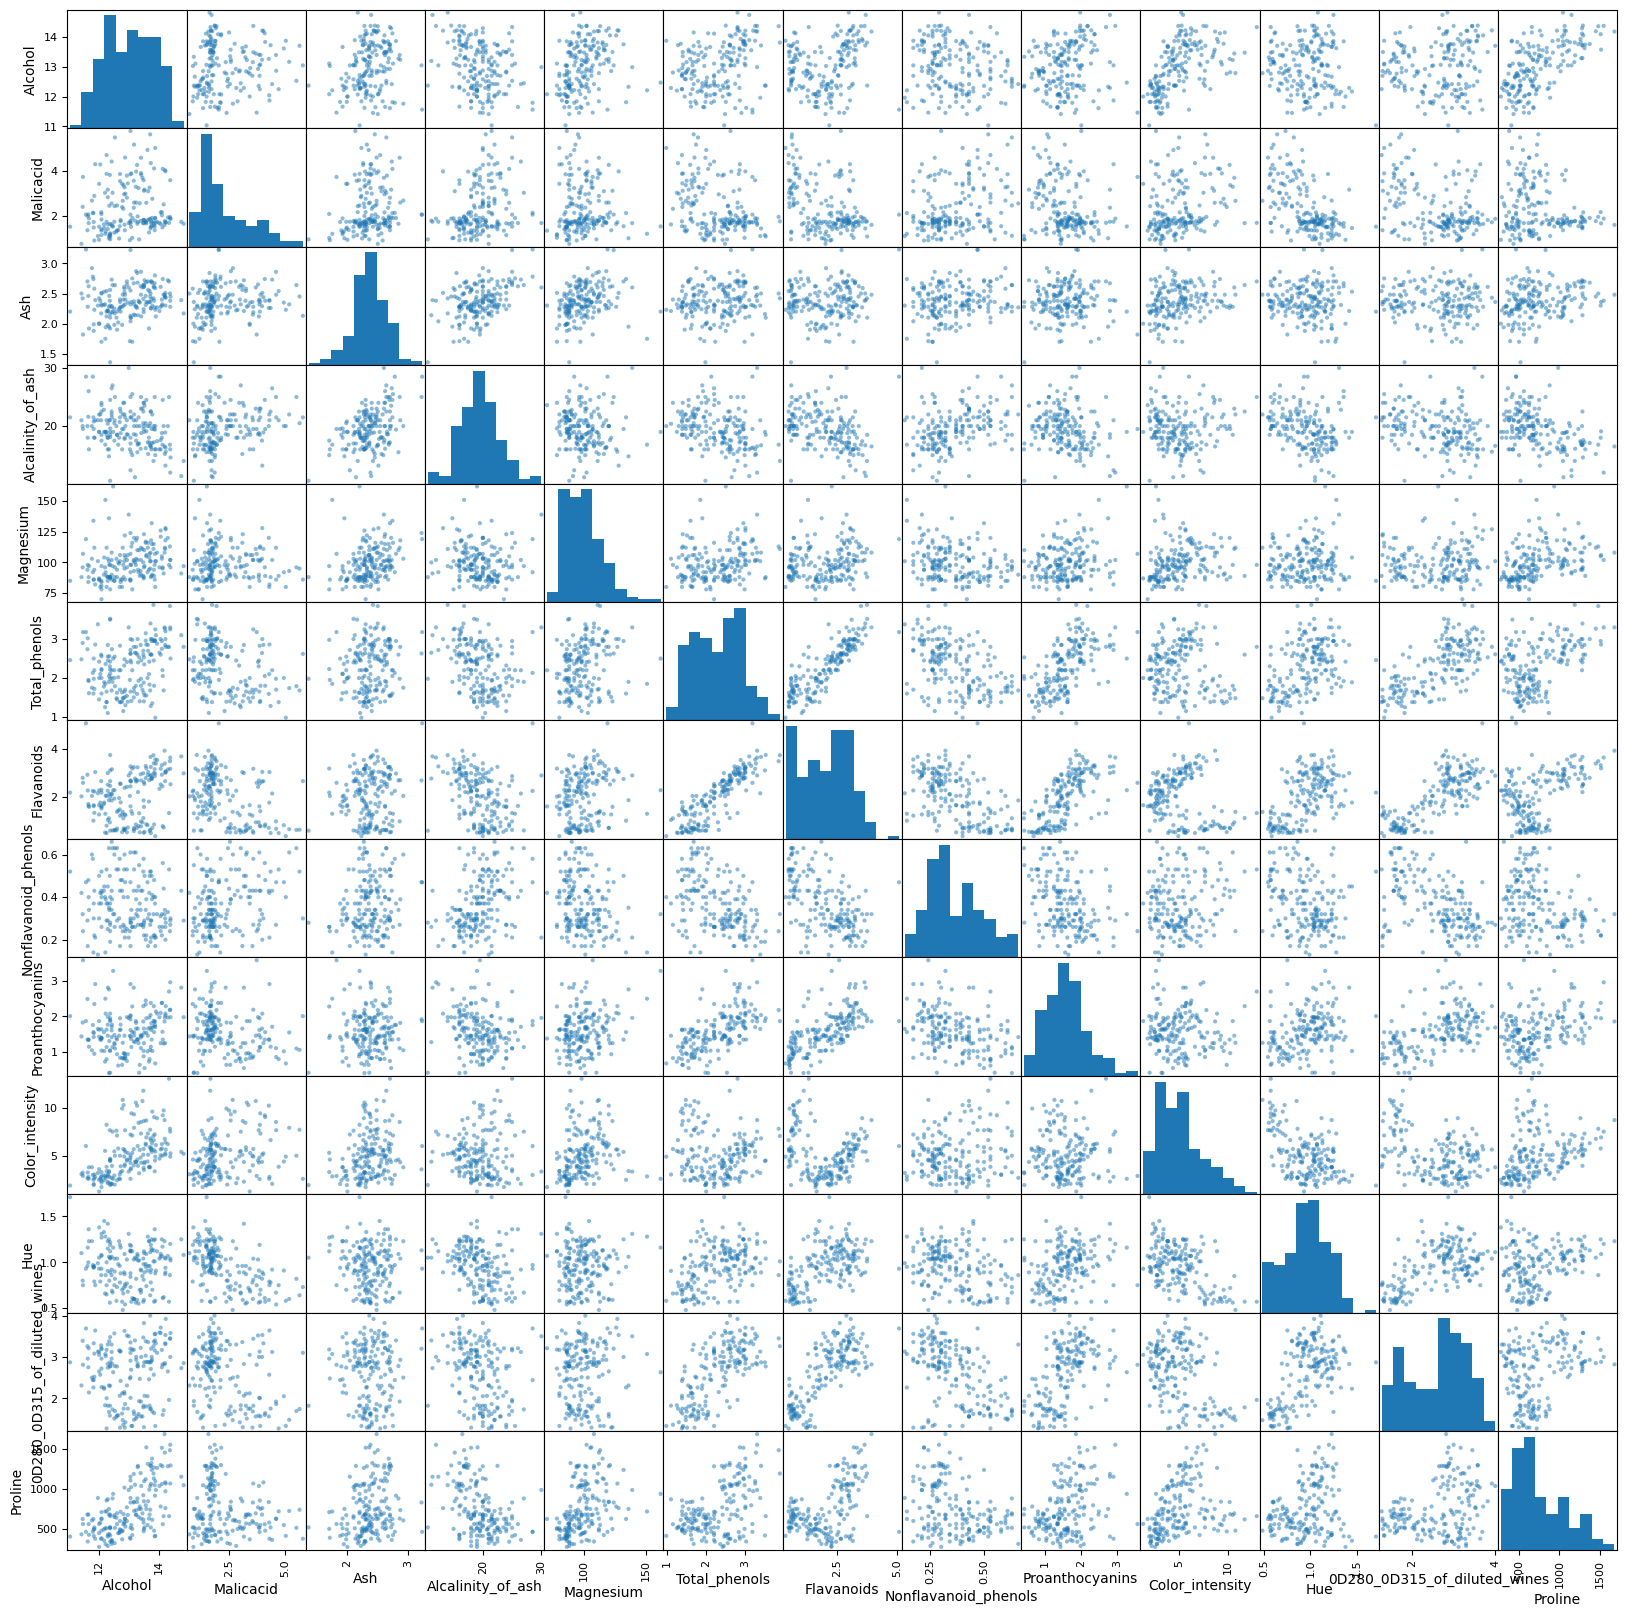

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(X[X.columns], figsize=(20,20))
plt.show()

# 5. 상관관계 계산

In [ ]:
corr_matrix = X.corr()
corr_matrix['Flavanoids'].sort_values(ascending=False)

Flavanoids                      1.000000
Total_phenols                   0.864564
0D280_0D315_of_diluted_wines    0.787194
Proanthocyanins                 0.652692
Hue                             0.543479
Proline                         0.494193
Alcohol                         0.236815
Magnesium                       0.195784
Ash                             0.115077
Color_intensity                -0.172379
Alcalinity_of_ash              -0.351370
Malicacid                      -0.411007
Nonflavanoid_phenols           -0.537900
Name: Flavanoids, dtype: float64

# 6. 결측값 유무 확인

In [ ]:
np.sum(X.isna())

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [ ]:
import random
random.seed(24)
ix = [(row, col) for row in range(X.shape[0]) for col in range(X.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    X.iat[row, col] = np.nan

In [ ]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,NaN,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,NaN
4,NaN,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,NaN,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,NaN,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,NaN,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
print(np.sum(X.isna()))
print(np.sum(np.sum(X.isna())))

Alcohol                         11
Malicacid                       14
Ash                             21
Alcalinity_of_ash               14
Magnesium                       20
Total_phenols                   20
Flavanoids                      21
Nonflavanoid_phenols            12
Proanthocyanins                 23
Color_intensity                 15
Hue                             25
0D280_0D315_of_diluted_wines    15
Proline                         20
dtype: int64
231


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy = "mean")
imputed_X = imputer.fit_transform(X)
imputed_X = pd.DataFrame(imputed_X, index=X.index, columns=X.columns)

In [ ]:
np.sum(imputed_X.isna())

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

# Ordinal Encoding

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

In [ ]:
diamonds

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,b'Ideal',b'D',b'SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,b'Good',b'D',b'SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,b'Very Good',b'D',b'SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,b'Premium',b'H',b'SI2',61.0,58.0,2757.0,6.15,6.12,3.74


In [ ]:
diamonds_color = diamonds['color'].head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

#categorical variables
diamonds_cut = diamonds[['cut']]
diamonds_color = diamonds[['color']]
diamonds_clarity = diamonds[['clarity']]

diamonds_cut_encoded = ordinal_encoder.fit_transform(diamonds_cut)
diamonds_color_encoded = ordinal_encoder.fit_transform(diamonds_color)
diamonds_clarity_encoded = ordinal_encoder.fit_transform(diamonds_clarity)
diamonds_clarity_encoded[:10]

array([[3.],
       [2.],
       [4.],
       [5.],
       [3.],
       [7.],
       [6.],
       [2.],
       [5.],
       [4.]])

In [ ]:
diamonds['cut'] = diamonds_cut_encoded
diamonds['color'] = diamonds_clarity_encoded
diamonds['clarity'] = diamonds_clarity_encoded

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,2.0,3.0,3.0,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3.0,2.0,2.0,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,1.0,4.0,4.0,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,3.0,5.0,5.0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,1.0,3.0,3.0,63.3,58.0,335.0,4.34,4.35,2.75


# One-Hot Encoding

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

In [ ]:
diamonds

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,b'Ideal',b'D',b'SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,b'Good',b'D',b'SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,b'Very Good',b'D',b'SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,b'Premium',b'H',b'SI2',61.0,58.0,2757.0,6.15,6.12,3.74


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

#categorical variables
diamonds_cut = diamonds[['cut']]
diamonds_color = diamonds[['color']]
diamonds_clarity = diamonds[['clarity']]

diamonds_cut_1hot = cat_encoder.fit_transform(diamonds_cut)
diamonds_color_1hot = cat_encoder.fit_transform(diamonds_color)
diamonds_clarity_1hot = cat_encoder.fit_transform(diamonds_clarity)
diamonds_clarity_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# MinMax Scaling

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

diamonds['carat'] = scaler.fit_transform(diamonds[['carat']])
diamonds['depth'] = scaler.fit_transform(diamonds[['depth']])
diamonds['table'] = scaler.fit_transform(diamonds[['table']])
diamonds['price'] = scaler.fit_transform(diamonds[['price']])
diamonds['\'x\''] = scaler.fit_transform(diamonds[['\'x\'']])
diamonds['\'y\''] = scaler.fit_transform(diamonds[['\'y\'']])
diamonds['\'z\''] = scaler.fit_transform(diamonds[['\'z\'']])

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.006237,b'Ideal',b'E',b'SI2',0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.002079,b'Premium',b'E',b'SI1',0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.006237,b'Good',b'E',b'VS1',0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.018711,b'Premium',b'I',b'VS2',0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.022869,b'Good',b'J',b'SI2',0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


# Standard Scaling

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

diamonds['carat'] = scaler.fit_transform(diamonds[['carat']])
diamonds['depth'] = scaler.fit_transform(diamonds[['depth']])
diamonds['table'] = scaler.fit_transform(diamonds[['table']])
diamonds['price'] = scaler.fit_transform(diamonds[['price']])
diamonds['\'x\''] = scaler.fit_transform(diamonds[['\'x\'']])
diamonds['\'y\''] = scaler.fit_transform(diamonds[['\'y\'']])
diamonds['\'z\''] = scaler.fit_transform(diamonds[['\'z\'']])

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,-1.198168,b'Ideal',b'E',b'SI2',-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,-1.240361,b'Premium',b'E',b'SI1',-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,-1.198168,b'Good',b'E',b'VS1',-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,-1.071587,b'Premium',b'I',b'VS2',0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,-1.029394,b'Good',b'J',b'SI2',1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674
